In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('./Salary_Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [6]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [7]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

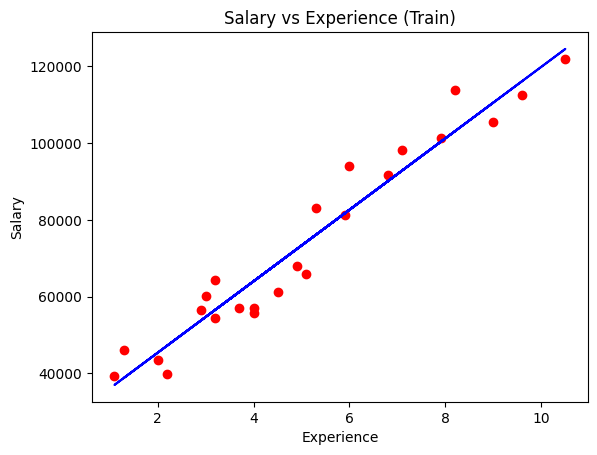

In [8]:
plt.scatter(x=X_train, y=y_train, color='red')
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Train)')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

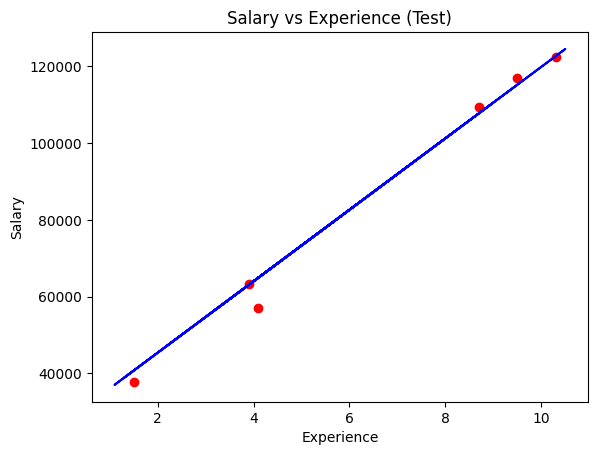

In [9]:
plt.scatter(x=X_test, y=y_test, color='red')
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test)')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

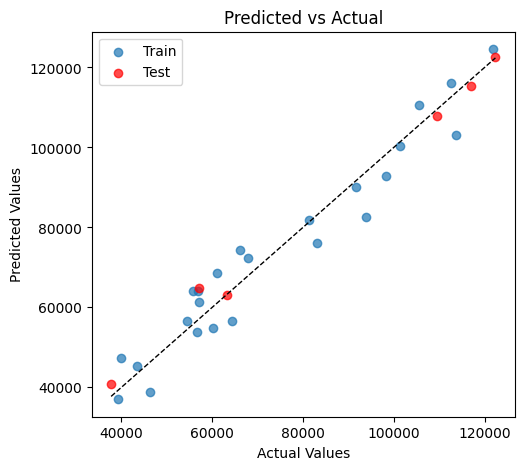

In [19]:
# Plot Predicted vs Actual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, regressor.predict(X_train), label="Train", alpha=0.7)
plt.scatter(y_test, y_pred, label="Test", alpha=0.7, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.legend()

In [14]:
y.min()

np.float64(37731.0)

In [15]:
y.max()

np.float64(122391.0)

## Anscombe's quartet Assumption

- It is important to visualize the dataset and regression line to understand below cases only first dataset is valid candidate for linear regression.
 - One is following linear trend
 - second is following non-linear trend
    - It is following quadratic like trend, we should use polynomial regression rather than linear regression
 - One has outlier
     - One outlier drastically impacting the regression line and gives misleading slope and intercept
 - One is nearly constant with outlier
     - Linear regression is not meaningful. remove the outlier if possible and use median regression instead



Dataset I: y = 0.50x + 3.00
Dataset II: y = 0.50x + 3.00
Dataset III: y = 0.50x + 3.00
Dataset IV: y = 0.50x + 3.00


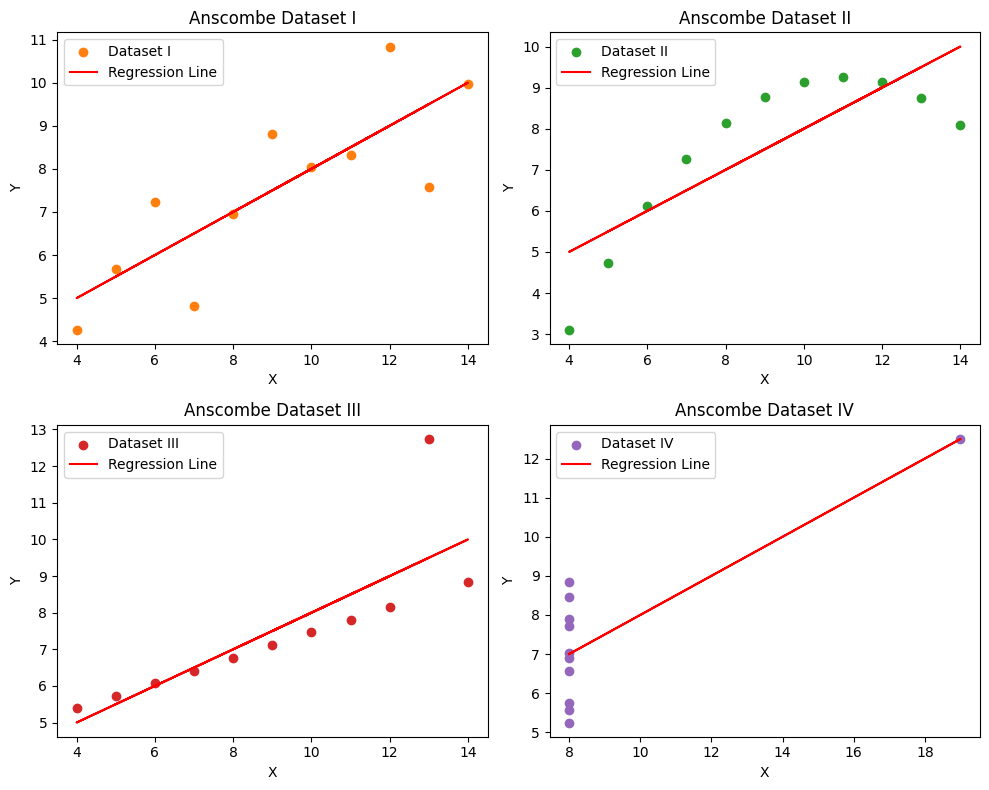

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Anscombe’s dataset
df = sns.load_dataset("anscombe")

# Get unique dataset names
datasets = df["dataset"].unique()

# Train Linear Regression for each dataset
models = {}
for dataset in datasets:
    subset = df[df["dataset"] == dataset]
    X = subset[["x"]].values  # Feature (reshape for sklearn)
    y = subset["y"].values    # Target

    model = LinearRegression()
    model.fit(X, y)  # Train model
    models[dataset] = model  # Store trained model

    # Print model parameters
    print(f"Dataset {dataset}: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

# Visualizing Regression Lines
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, (ax, dataset) in enumerate(zip(axes, datasets), start=1):
    subset = df[df["dataset"] == dataset]
    X = subset[["x"]].values
    y_pred = models[dataset].predict(X)  # Get predictions

    # Scatter plot + Regression line
    ax.scatter(subset["x"], subset["y"], label=f"Dataset {dataset}", color=f"C{i}")
    ax.plot(subset["x"], y_pred, color="red", label="Regression Line")
    
    ax.set_title(f"Anscombe Dataset {dataset}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

plt.tight_layout()
plt.show()


Assumption of data behaviour

- Linearity
    - There should be linear relationship between dependent variable and independent variable
- Homescedastic
    - Variance of error terms across different independent variables is consistent across otherwise it is heteroscedastic

- Multivariate Normality

- Independence[no corelation between variables]
    - Observations should be independent of each other then we don't apply linear regression
- Lack of multicollinearity
    - Independent variable shouldn't be correlated.
- Outlier check
    - Outliers shouldn't impact your linear regression line. so we have to take care of it..

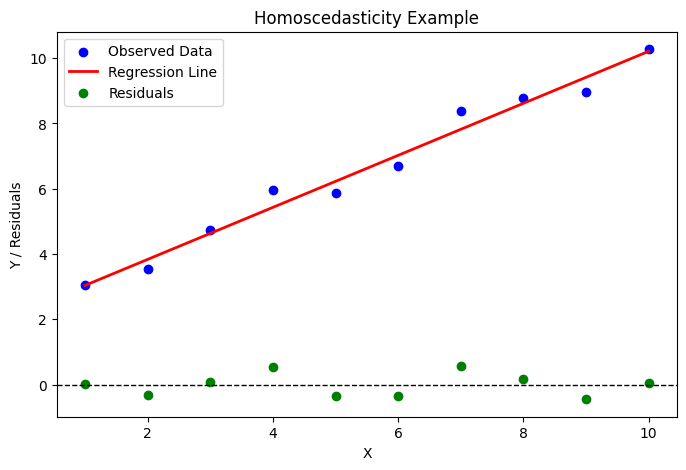

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Generate homoscedastic data (constant variance)
np.random.seed(42)
X = np.arange(1, 11).reshape(-1, 1)
y = 2 + 0.8 * X.flatten() + np.random.normal(0, 0.5, size=X.shape[0])  # Small constant noise

# Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot Data and Regression Line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Observed Data", color="blue")
plt.plot(X, y_pred, color="red", label="Regression Line", linewidth=2)

# Plot Residuals
residuals = y - y_pred
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Zero residual line
plt.scatter(X, residuals, color="green", label="Residuals")

# Labels and Legend
plt.xlabel("X")
plt.ylabel("Y / Residuals")
plt.title("Homoscedasticity Example")
plt.legend()
plt.show()


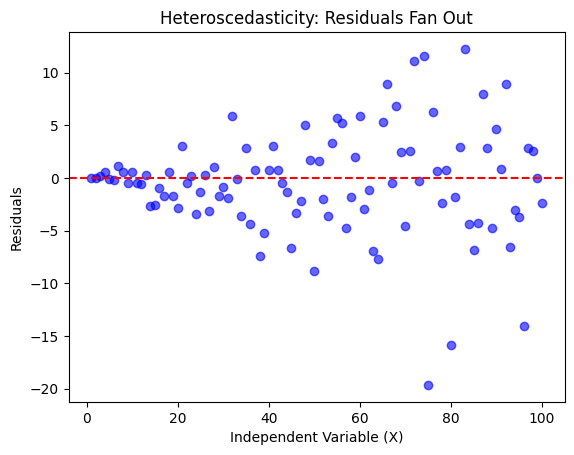

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
X = np.linspace(1, 100, 100)  # Independent variable
errors = np.random.normal(0, X * 0.1, 100)  # Increasing spread of errors
Y = 2 * X + errors  # Linear relation with heteroscedastic noise

# Compute residuals
predicted_Y = 2 * X  # Predicted values from a simple linear model
residuals = Y - predicted_Y  # Residuals (actual - predicted)

# Plot residuals
plt.scatter(X, residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="dashed")  # Zero residual line
plt.xlabel("Independent Variable (X)")
plt.ylabel("Residuals")
plt.title("Heteroscedasticity: Residuals Fan Out")
plt.show()


## Multivariate normality

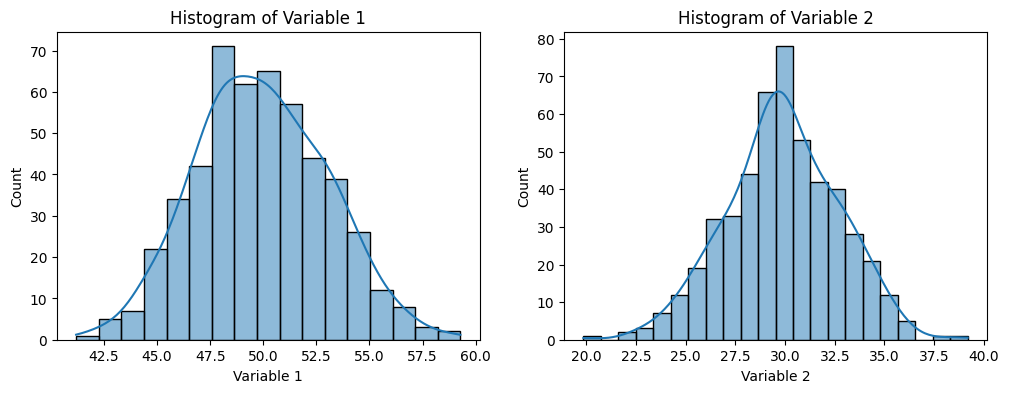

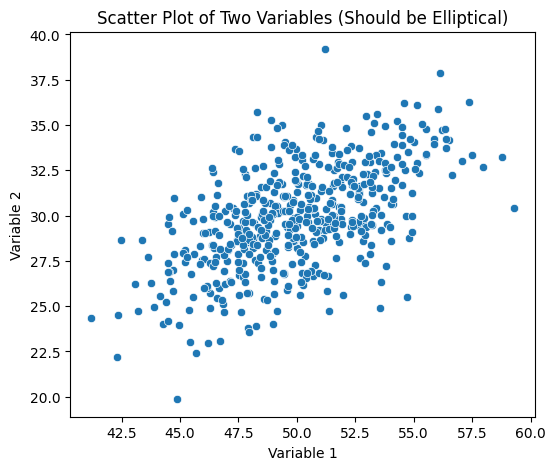

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate random data for two correlated normal variables
mean = [50, 30]  # Mean of two variables
cov = [[10, 5],  # Covariance matrix (some correlation)
       [5, 8]]

# Generate 500 samples from a multivariate normal distribution
data = np.random.multivariate_normal(mean, cov, 500)
df = pd.DataFrame(data, columns=["Variable 1", "Variable 2"])

# Plot histogram for univariate normality check
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df["Variable 1"], kde=True, ax=axes[0])
sns.histplot(df["Variable 2"], kde=True, ax=axes[1])
axes[0].set_title("Histogram of Variable 1")
axes[1].set_title("Histogram of Variable 2")

# Scatter plot for joint normality check
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df["Variable 1"], y=df["Variable 2"])
plt.title("Scatter Plot of Two Variables (Should be Elliptical)")
plt.show()
